## **2.4 Supervised Learning – Classification Models**


**Import model tools**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split

**Train-Test Split (80-20)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

**Helper function to evaluate models**

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n🔍 {name}")
    print(classification_report(y_test, y_pred))

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        try:
            auc = roc_auc_score(
                y_test,
                y_prob,
                multi_class="ovr",        # Handles multi-class
                average="weighted"
            )
            print(f"AUC (weighted): {auc:.3f}")
        except:
            print("AUC not available for this model.")
    print("-" * 60)

**Train all 4 models**

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)  # for AUC/ROC
}

trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    evaluate_model(name, model, X_test, y_test)


🔍 Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.14      0.11      0.12         9
           2       0.25      0.20      0.22         5
           3       0.20      0.14      0.17         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.29      0.28      0.28        60
weighted avg       0.58      0.62      0.59        60

AUC (weighted): 0.833
------------------------------------------------------------

🔍 Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        36
           1       0.20      0.33      0.25         9
           2       0.33      0.60      0.43         5
           3       0.40      0.29      0.33         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Model Comparison Bar Chart**

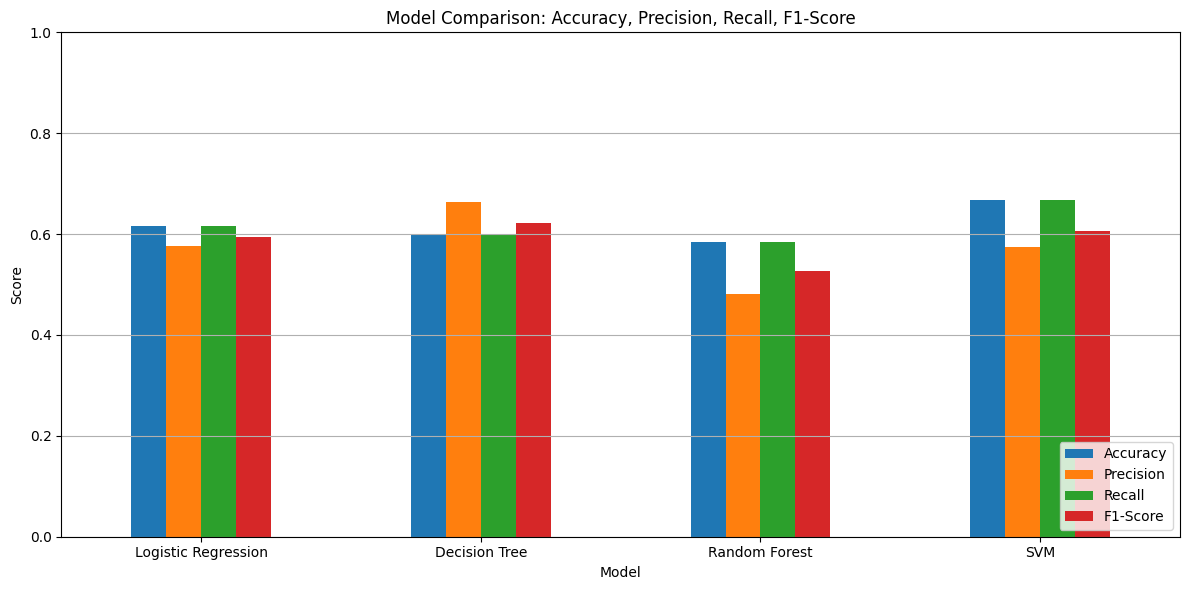

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

model_scores = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    model_scores['Model'].append(name)
    model_scores['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_scores['Precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    model_scores['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    model_scores['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))

scores_df = pd.DataFrame(model_scores)
scores_df.set_index('Model', inplace=True)

# Plot
scores_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison: Accuracy, Precision, Recall, F1-Score')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

**ROC Curve Plot**

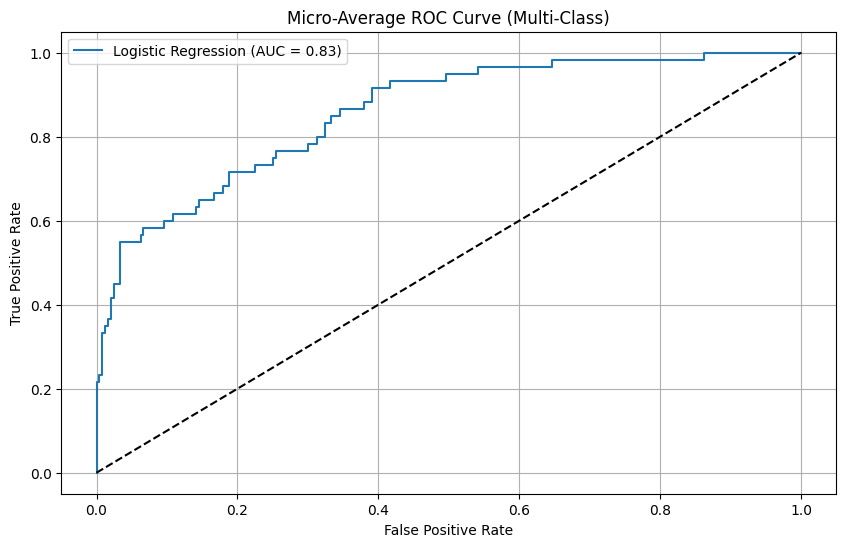

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 6))
for name, model in trained_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        y_test_bin = label_binarize(y_test, classes=classes)
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
        auc = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Average ROC Curve (Multi-Class)')
plt.legend()
plt.grid(True)
plt.show()

### ✅ Deliverables:

- Trained models: Logistic Regression, Decision Tree, Random Forest, SVM
- Evaluation metrics: Accuracy, Precision, Recall, F1, AUC
- ROC curve comparison chart

**Next Step:** 2.5 Unsupervised Learning – Clustering
